# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression 
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier

# Loading Train and Test datasets

In [2]:
#load data
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [3]:
train_data.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [4]:
test_data.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

# Exploration of Data

In [5]:
train_data.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

In [3]:
#We have to convert target variable into 'int64' for further arithmatic operation
train_data['target']=train_data['target'].astype('int64')

In [7]:
train_data['target'].unique()

array([0, 1], dtype=int64)

In [8]:
test_data.dtypes

ID_code     object
var_0      float64
var_1      float64
var_2      float64
var_3      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 201, dtype: object

# Missing value analysis

In [9]:
train_data.isnull().sum().sum()

0

In [10]:
test_data.isnull().sum().sum()

0

# Outlier analysis

### 1] Apply outlier analysis on numeric data. So lets find out numeric feature variables

In [4]:
numerical_features=train_data.columns[2:]
numerical_features

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

### 2] Detect and make nan to outliers

In [5]:
for i in numerical_features:
    #print(i)
    q75, q25 = np.percentile(sorted(train_data.loc[:,i]), [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    
    train_data[train_data[i] < min] = np.nan
    train_data[train_data[i] > max] = np.nan


C:\Users\acer\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


### 3] Impute nan values with mean Imputation method

In [7]:
train_data = train_data.fillna(train_data.mean())

### Now apply above three steps for test dataset

In [8]:
numerical_features_test=test_data.columns[1:]
for i in numerical_features_test:

    q75, q25 = np.percentile(test_data.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    
    test_data[test_data[i] < min] = np.nan
    test_data[test_data[i] > max] = np.nan

In [9]:
test_data = test_data.fillna(test_data.mean())

# Data Visualization

In [10]:
#While doing outlier analysis our target variable again get transform to folat type 
#so here we again type cast it to int64 
train_data['target']=train_data['target'].astype('int64')

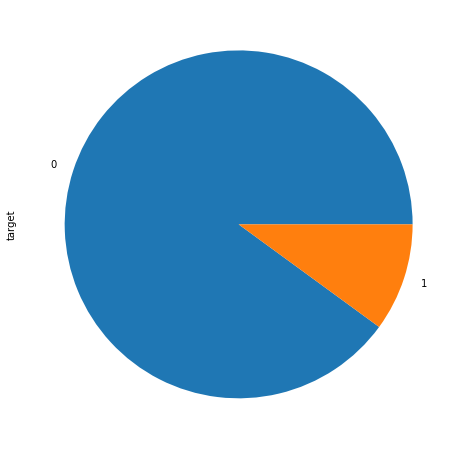

In [21]:
#plotting pie chart for target class
train_data['target'].value_counts().plot(kind='pie', figsize=(8,8))

Distribution of Columns


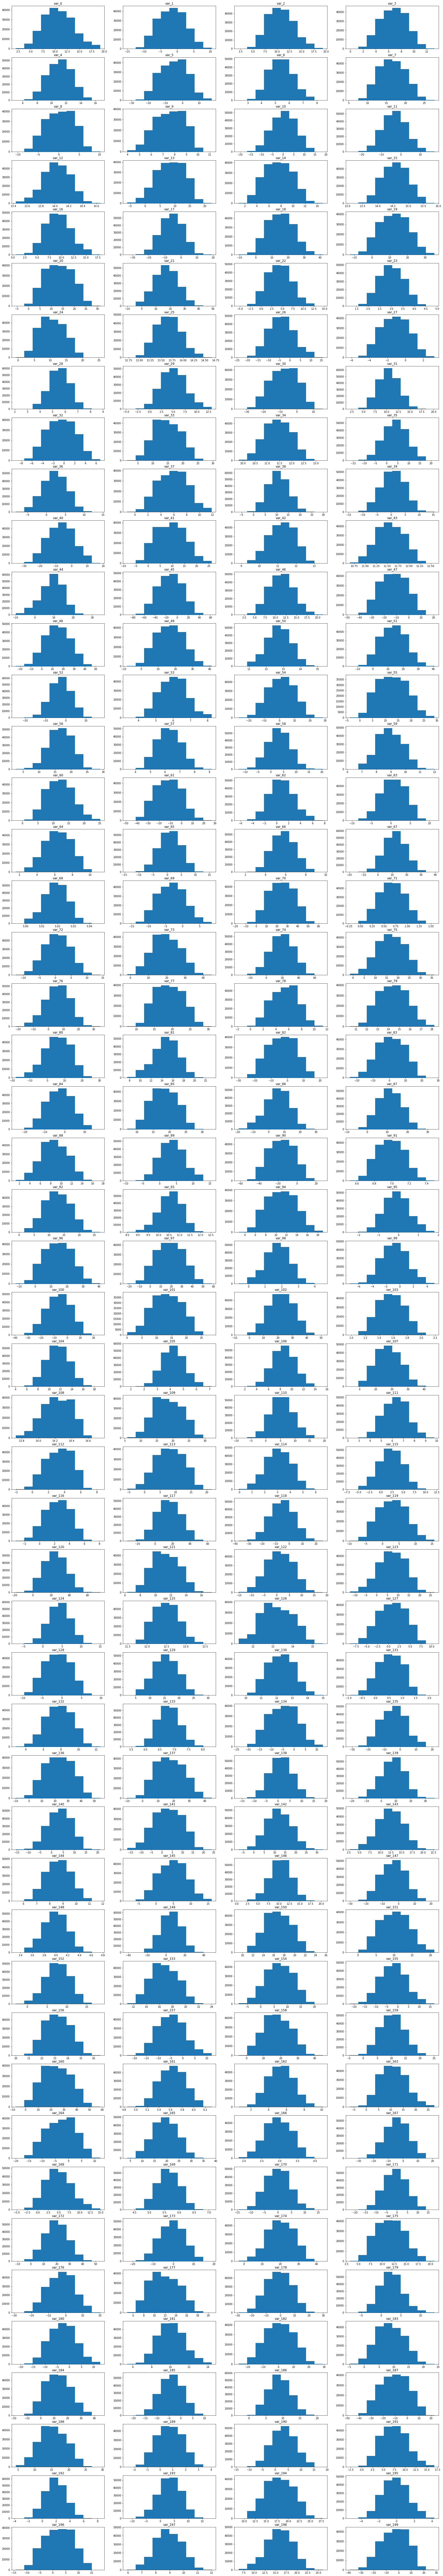

In [22]:
#hisograms are used to check distribution of data 
#draw histograms of numeric data in training set 
print("Distribution of Columns")
plt.figure(figsize=(30,185))
for i,col in enumerate(numerical_features):
    plt.subplot(50,4,i+1)
    plt.hist(train_data[col])
    plt.title(col)   

Distribution of columns per target class


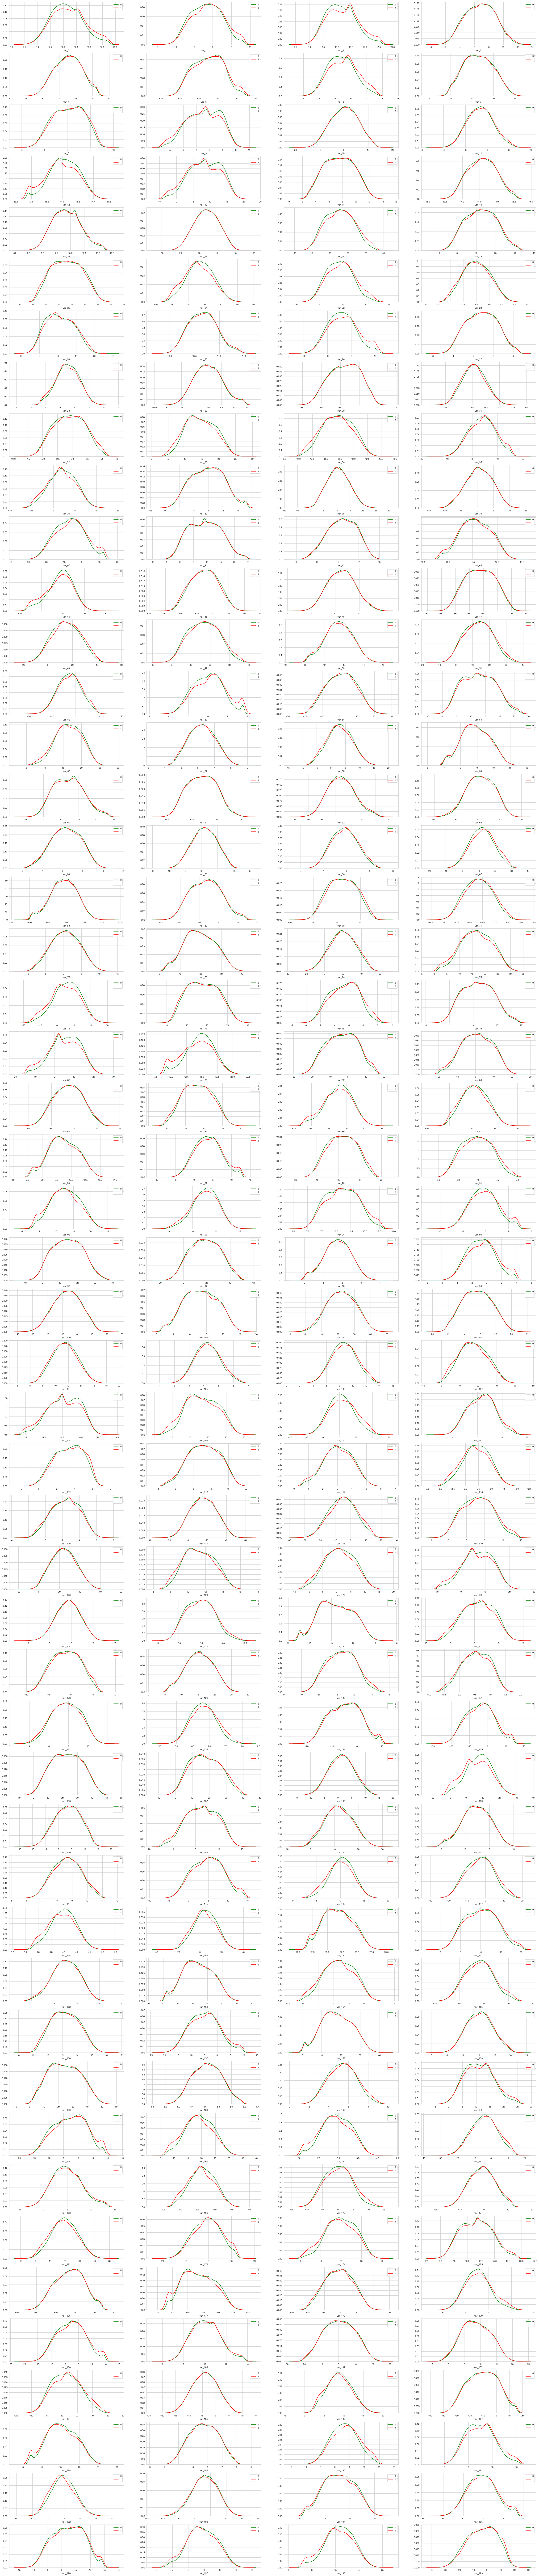

In [23]:
import seaborn as sns
print("Distribution of columns per target class")
sns.set_style('whitegrid')
plt.figure(figsize=(40,200))
for i,col in enumerate(numerical_features):
    plt.subplot(50,4,i+1)
    sns.distplot(train_data[train_data['target']==0][col],hist=False,label='0',color='green')
    sns.distplot(train_data[train_data['target']==1][col],hist=False,label='1',color='red')

Distribution of columns for test and train datset


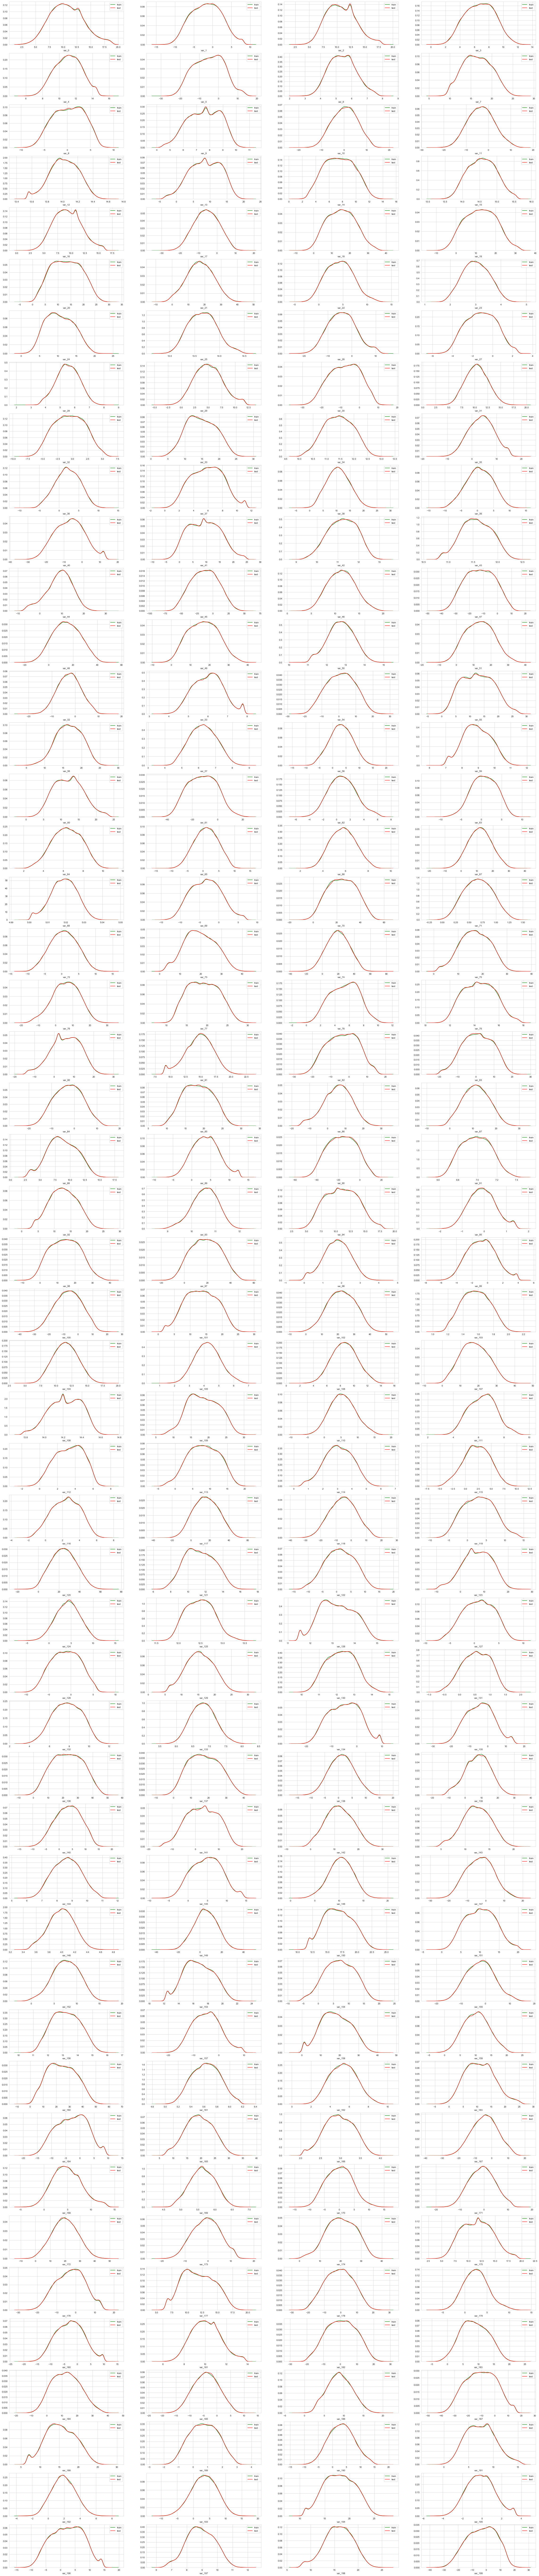

In [24]:
#Distribution of numeri variables in train and test data 
print("Distribution of columns for test and train datset")
sns.set_style('whitegrid')
plt.figure(figsize=(40,200))
for i,col in enumerate(numerical_features):
    plt.subplot(50,4,i+1)
    sns.distplot(train_data[col],hist=False,label='train',color='green')
    sns.distplot(test_data[col],hist=False,label='test',color='red')

### Distribution of mean,median,standard deviation,kurtosis frequency, skewness frequency, min, max of train dataset for both targets (0 and 1)

In [25]:
numerical_features_with_values=train_data.columns.values[2:202]

In [26]:
train_mean_rowwise_1=list(train_data[train_data['target']==1][numerical_features_with_values].mean(axis=1))
train_mean_rowwise_0=list(train_data[train_data['target']==0][numerical_features_with_values].mean(axis=1))

train_median_rowwise_1=list(train_data[train_data['target']==1][numerical_features_with_values].median(axis=1))
train_median_rowwise_0=list(train_data[train_data['target']==0][numerical_features_with_values].median(axis=1))

train_std_rowwise_1=list(train_data[train_data['target']==1][numerical_features_with_values].std(axis=1))
train_std_rowwise_0=list(train_data[train_data['target']==0][numerical_features_with_values].std(axis=1))

train_kurt_rowwise_1=list(train_data[train_data['target']==1][numerical_features_with_values].kurt(axis=1))
train_kurt_rowwise_0=list(train_data[train_data['target']==0][numerical_features_with_values].kurt(axis=1))

train_skew_rowwise_1=list(train_data[train_data['target']==1][numerical_features_with_values].skew(axis=1))
train_skew_rowwise_0=list(train_data[train_data['target']==0][numerical_features_with_values].skew(axis=1))

train_min_rowwise_1=list(train_data[train_data['target']==1][numerical_features_with_values].min(axis=1))
train_min_rowwise_0=list(train_data[train_data['target']==0][numerical_features_with_values].min(axis=1))

train_max_rowwise_1=list(train_data[train_data['target']==1][numerical_features_with_values].max(axis=1))
train_max_rowwise_0=list(train_data[train_data['target']==0][numerical_features_with_values].max(axis=1))

In [27]:
def plot_stats_train(x1,x2,aim,wise):
    colors = ['#4E00E6', '#31CF06']
    names = ['target 0','target 1']
    plt.figure(figsize=(25,8))
    plt.hist([x1,x2], bins =120, density=True,
         color = colors, label=names)
    sns.kdeplot(x1,color=colors[0])
    sns.kdeplot(x2,color=colors[1])
    # Plot formatting
    plt.legend()
    plt.xlabel(aim+' values')
    plt.ylabel('Normalized Density')
    plt.title('Distribution of '+aim+' per '+wise+' in train data')

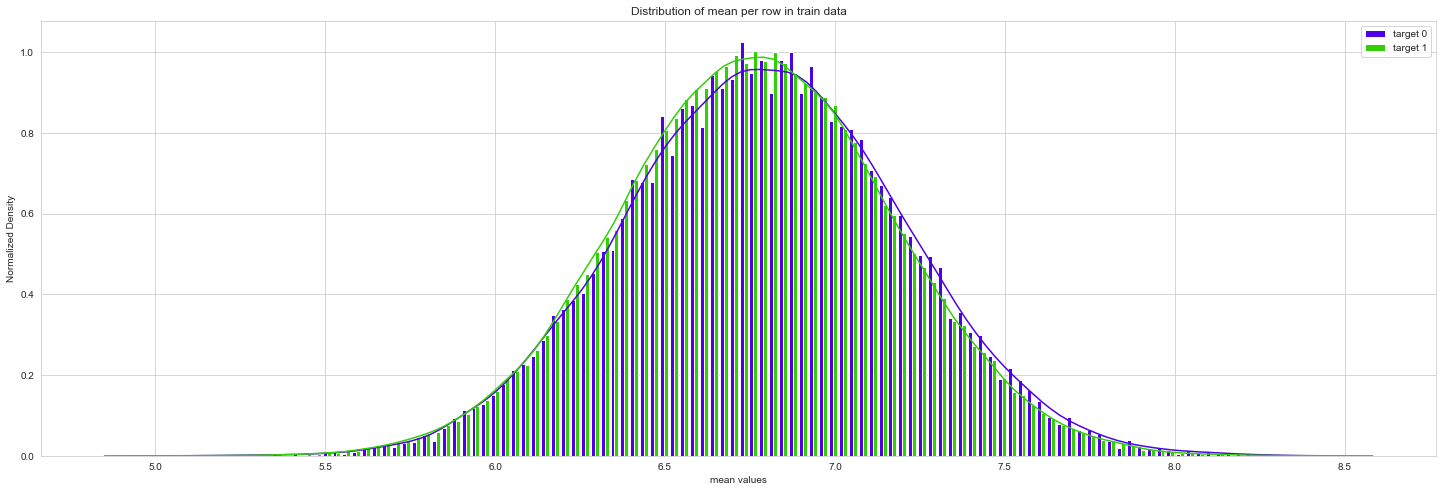

In [28]:
plot_stats_train(train_mean_rowwise_1,train_mean_rowwise_0,'mean',"row")

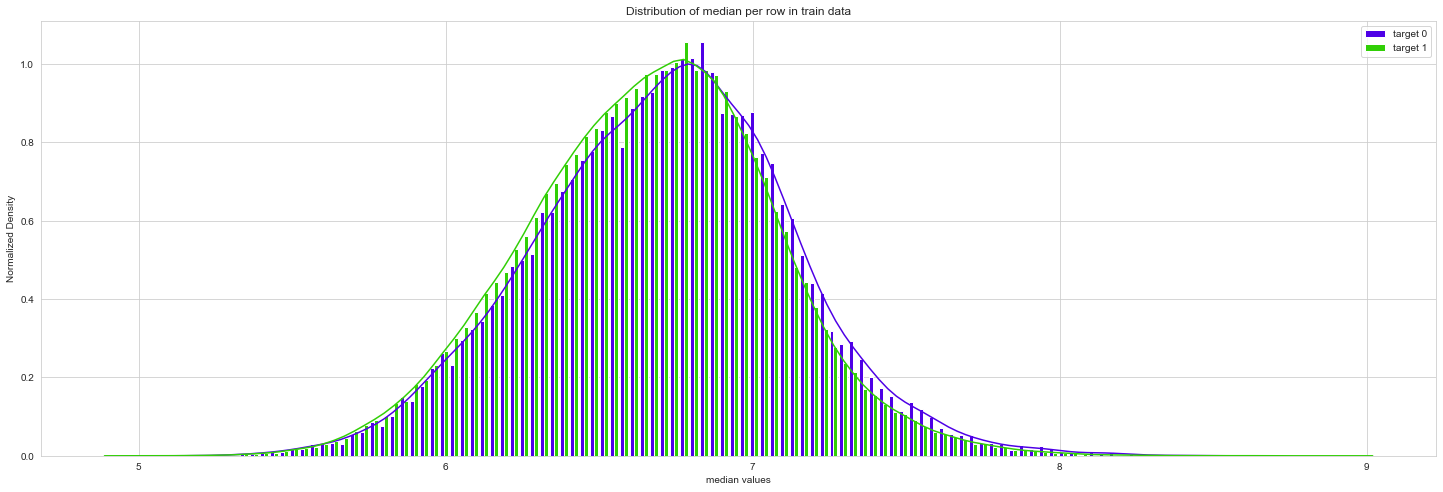

In [29]:
plot_stats_train(train_median_rowwise_1,train_median_rowwise_0,'median',"row")

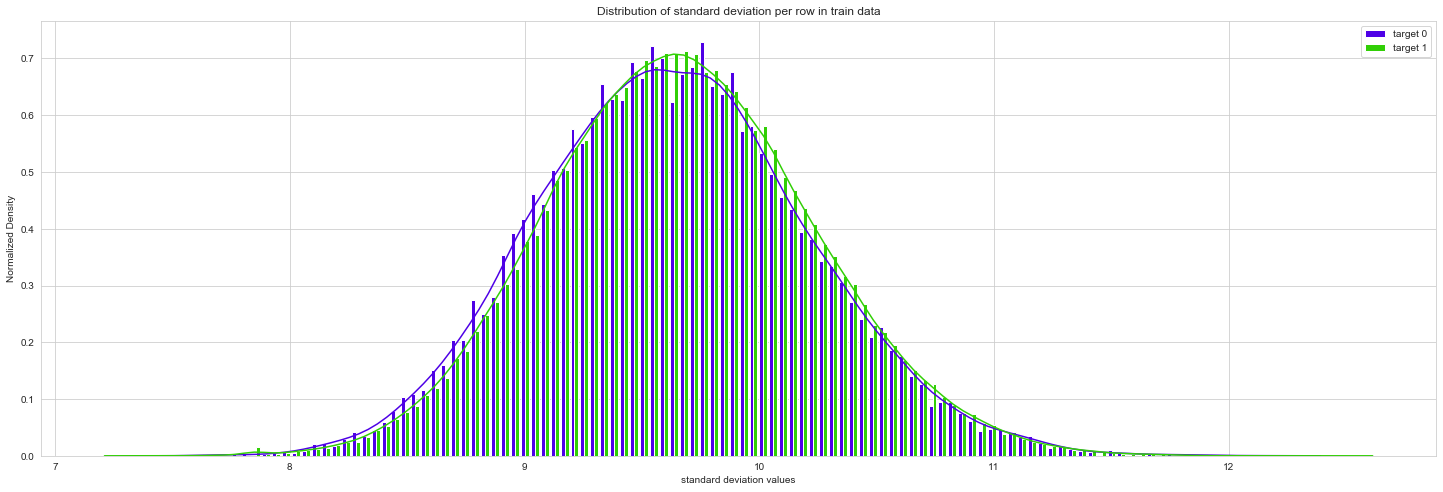

In [30]:
plot_stats_train(train_std_rowwise_1,train_std_rowwise_0,'standard deviation',"row")

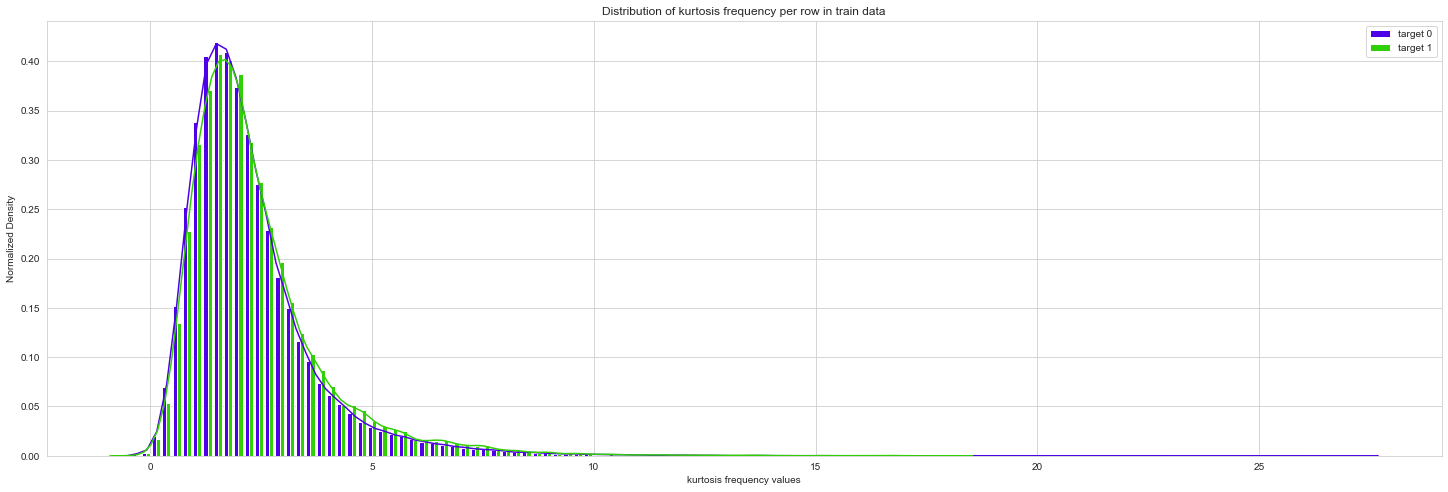

In [31]:
plot_stats_train(train_kurt_rowwise_0,train_kurt_rowwise_1,'kurtosis frequency', 'row')

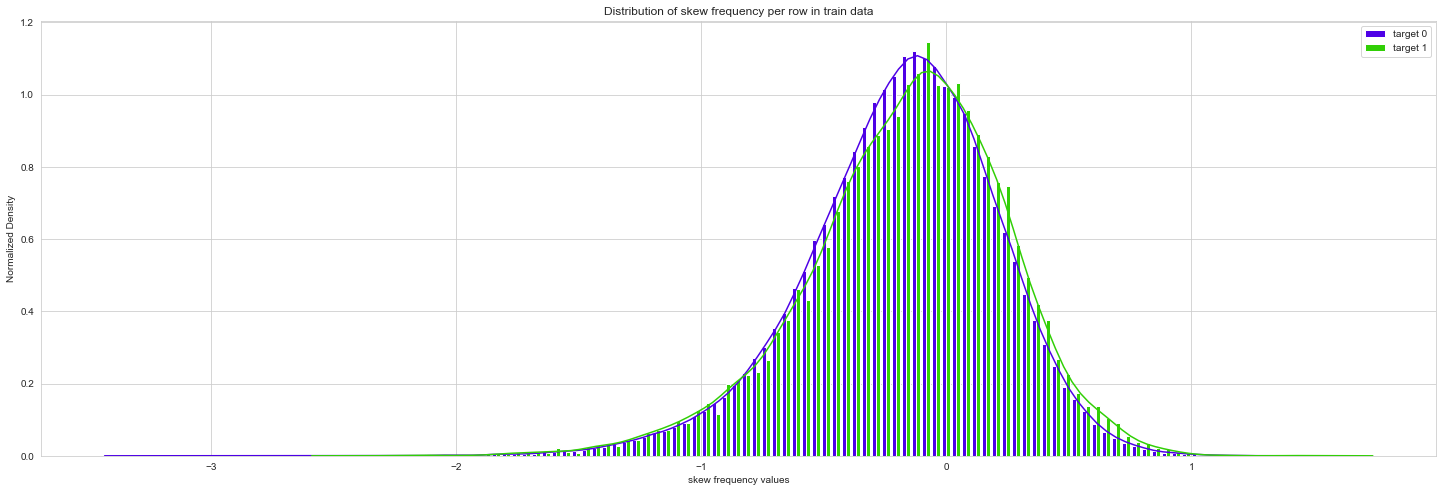

In [32]:
plot_stats_train(train_skew_rowwise_0,train_skew_rowwise_1,'skew frequency', 'row')

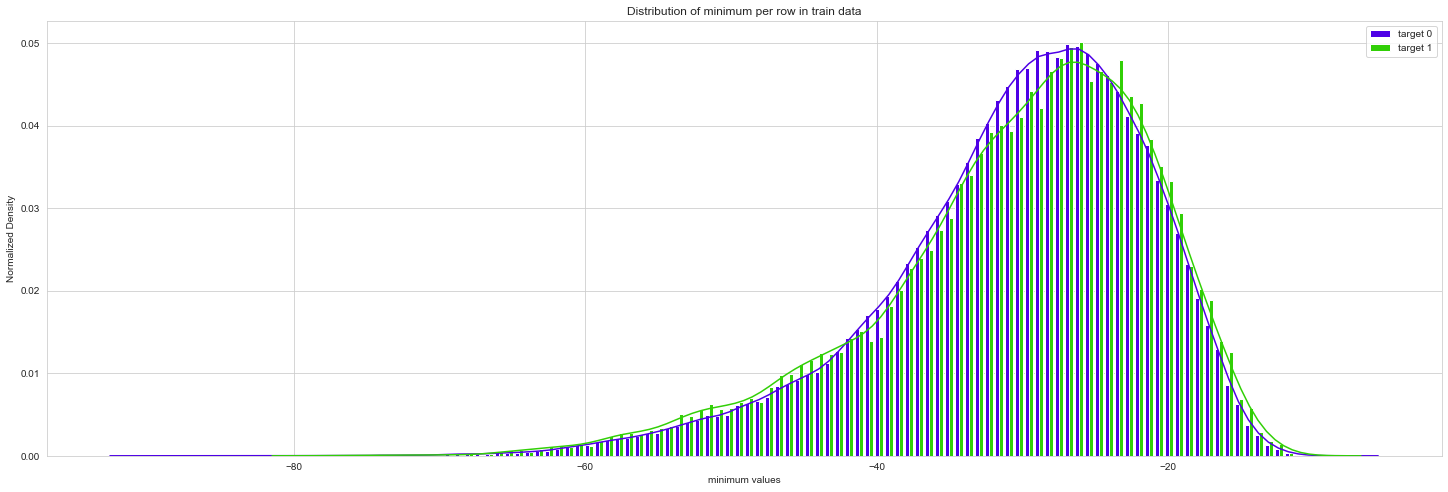

In [33]:
plot_stats_train(train_min_rowwise_0,train_min_rowwise_1,'minimum', 'row')

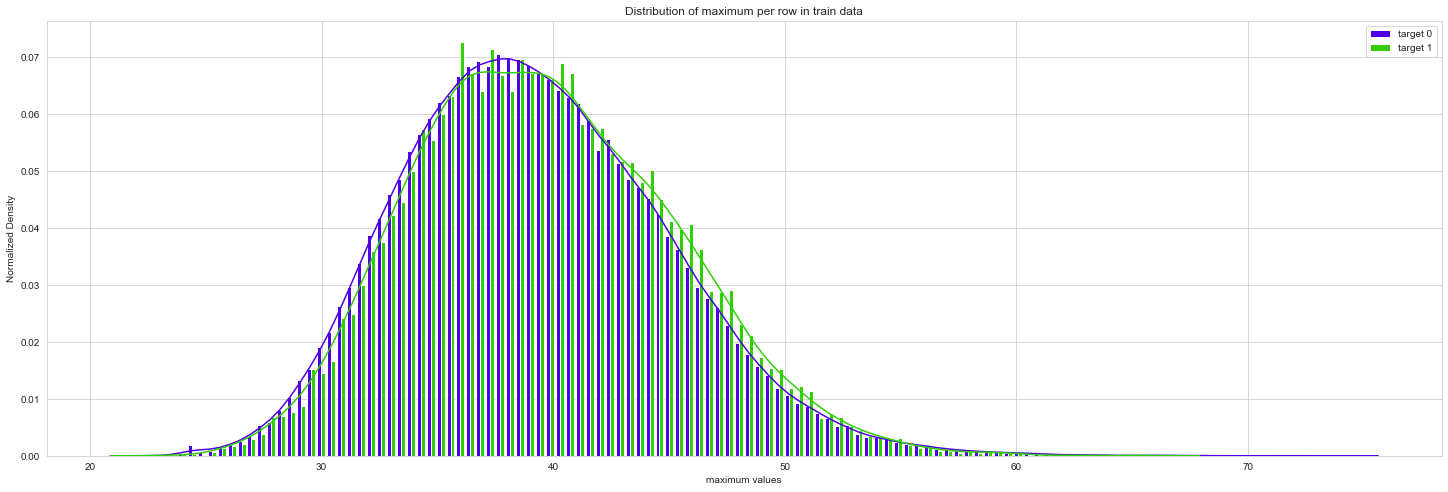

In [34]:
plot_stats_train(train_max_rowwise_0,train_max_rowwise_1,'maximum', 'row')

### Distribution of mean,median,standard deviation,kurtosis frequency, skewness frequency, min, max of train and test dataset both column wise

In [35]:
train_mean_colwise=list(train_data[numerical_features_with_values].mean(axis=0))
test_mean_colwise=list(test_data[numerical_features_with_values].mean(axis=0))

train_median_colwise=list(train_data[numerical_features_with_values].median(axis=0))
test_median_colwise=list(test_data[numerical_features_with_values].median(axis=0))

train_std_colwise=list(train_data[numerical_features_with_values].std(axis=0))
test_std_colwise=list(test_data[numerical_features_with_values].std(axis=0))

train_kurt_colwise=list(train_data[numerical_features_with_values].kurt(axis=0))
test_kurt_colwise=list(test_data[numerical_features_with_values].kurt(axis=0))

train_skew_colwise=list(train_data[numerical_features_with_values].skew(axis=0))
test_skew_colwise=list(test_data[numerical_features_with_values].skew(axis=0))

train_min_colwise=list(train_data[numerical_features_with_values].min(axis=0))
test_min_colwise=list(test_data[numerical_features_with_values].min(axis=0))

train_max_colwise=list(train_data[numerical_features_with_values].max(axis=0))
test_max_colwise=list(test_data[numerical_features_with_values].max(axis=0))

In [36]:
def plot_stats(x1,x2,aim,wise):
    colors = [ '#FA7201', '#0E7B00']
    names = ['train','test']
    plt.figure(figsize=(28,8))
    plt.hist([x1,x2], bins =120, density=True,
         color = colors, label=names)
    sns.kdeplot(x1,color=colors[0])
    sns.kdeplot(x2,color=colors[1])
    # Plot formatting
    plt.legend()
    plt.xlabel(aim+' values')
    plt.ylabel('Normalized Density')
    plt.title('Distribution of '+aim+' per '+wise+' in test and train data')

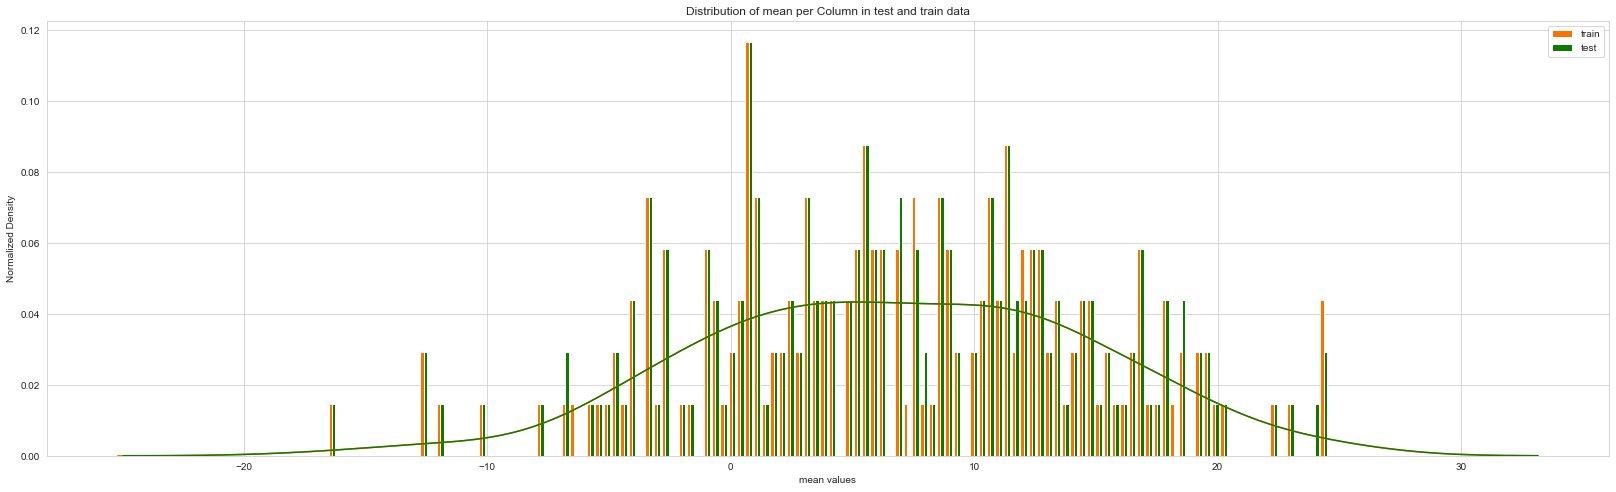

In [37]:
plot_stats(train_mean_colwise,test_mean_colwise,'mean','Column')

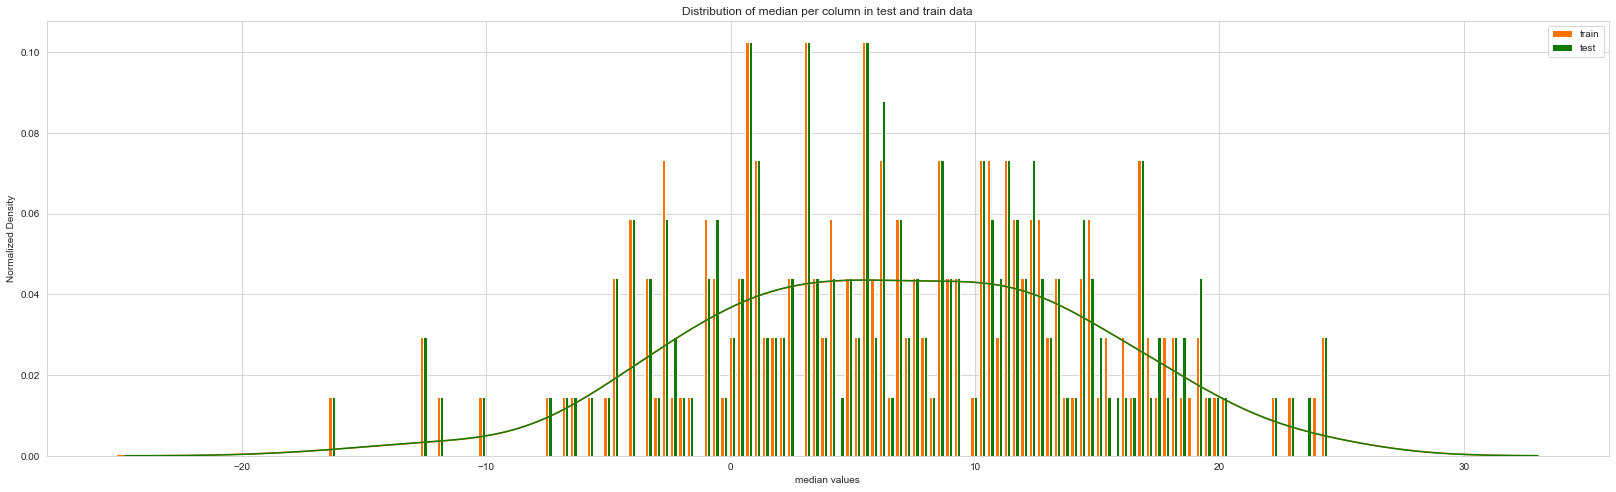

In [38]:
plot_stats(train_median_colwise,test_median_colwise,'median','column')

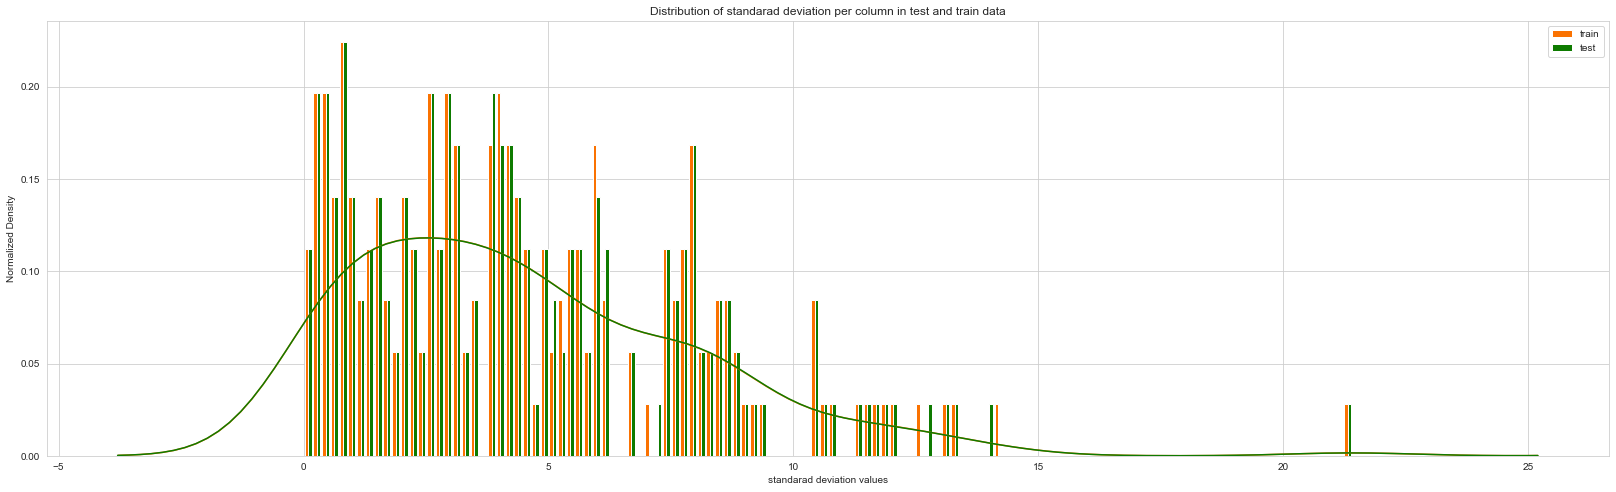

In [39]:
plot_stats(train_std_colwise,test_std_colwise,'standarad deviation','column')

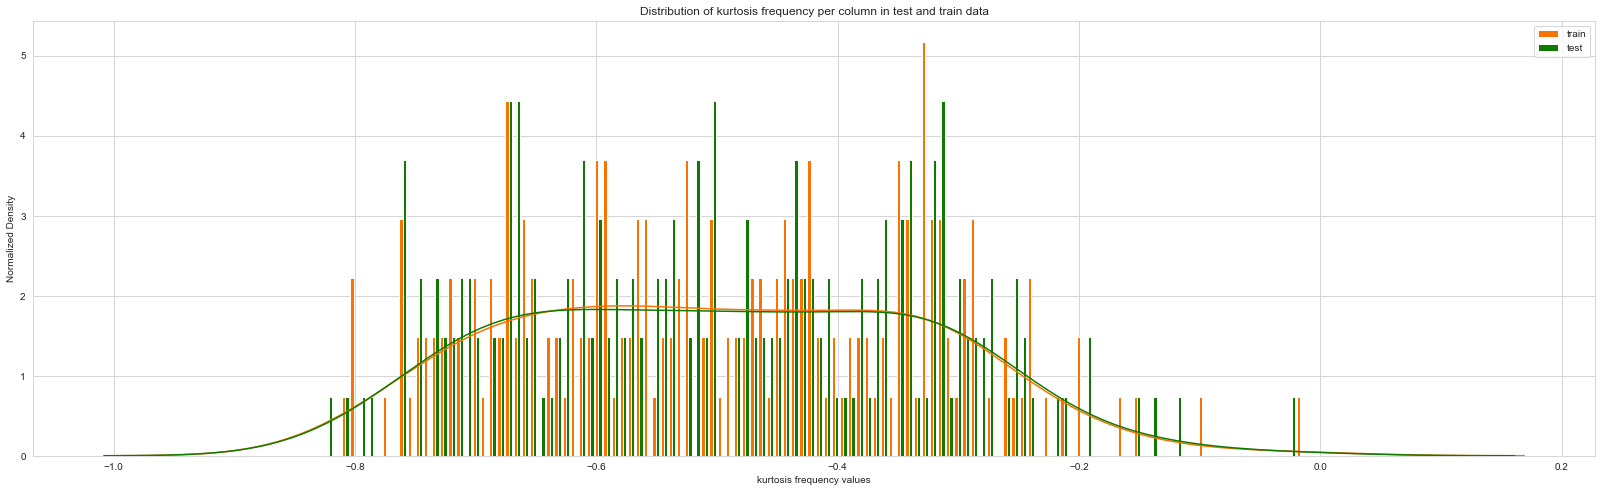

In [40]:
plot_stats(train_kurt_colwise,test_kurt_colwise,'kurtosis frequency','column')

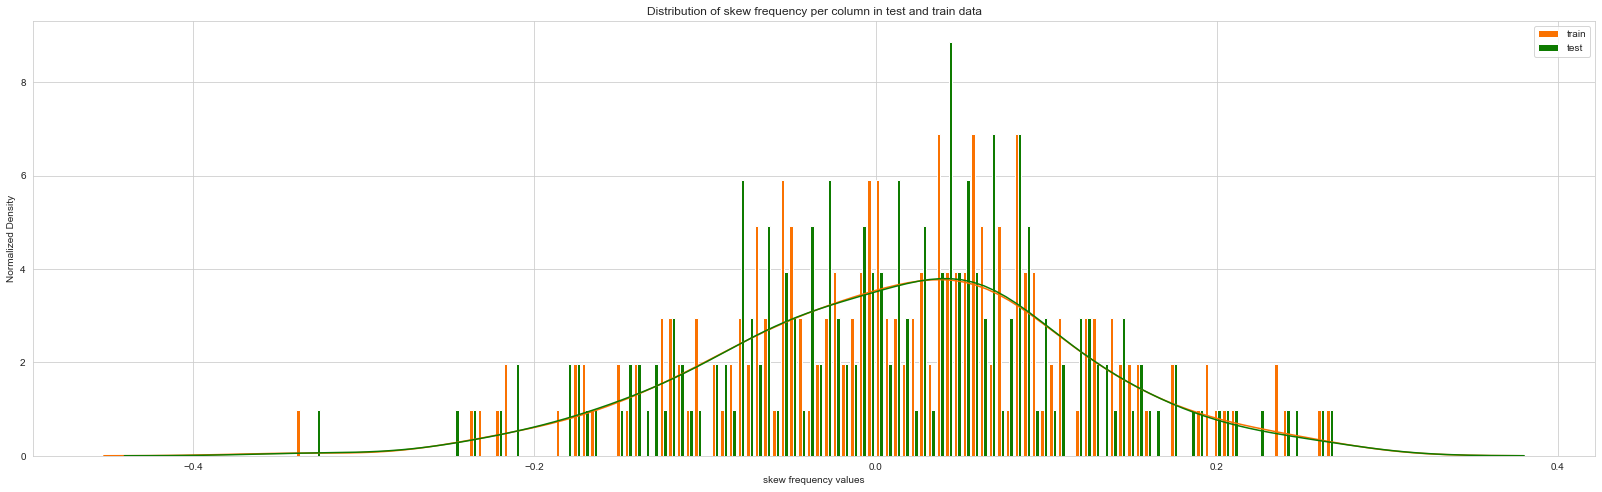

In [41]:
plot_stats(train_skew_colwise,test_skew_colwise,'skew frequency','column')

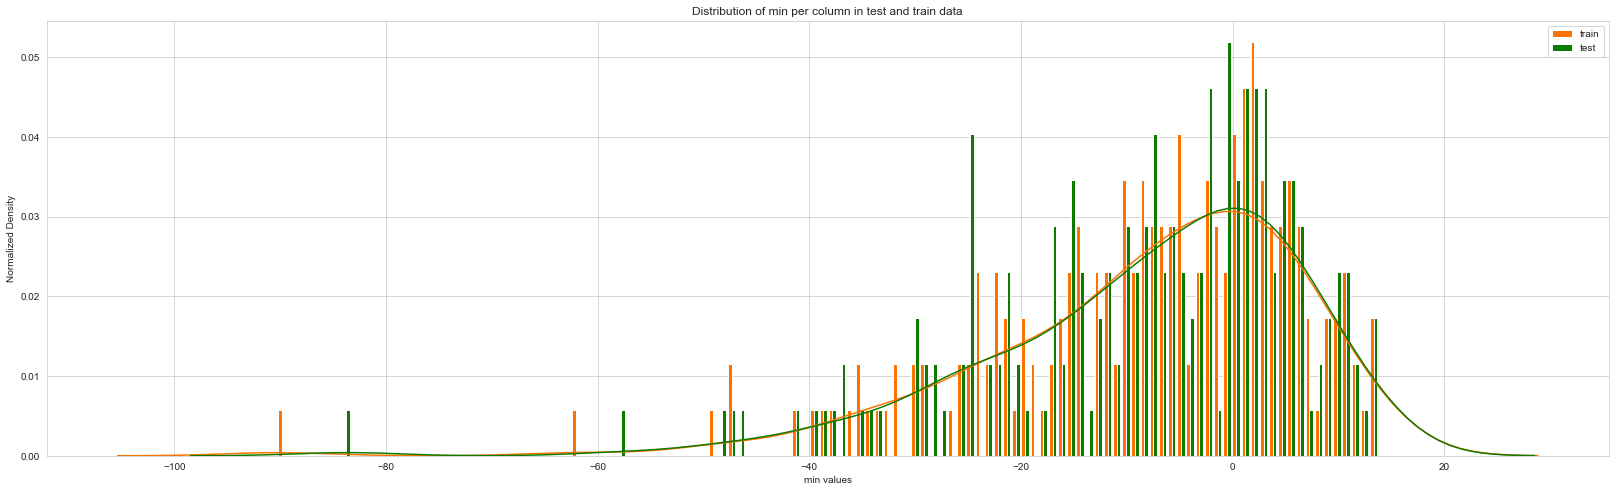

In [42]:
plot_stats(train_min_colwise,test_min_colwise,'min','column')

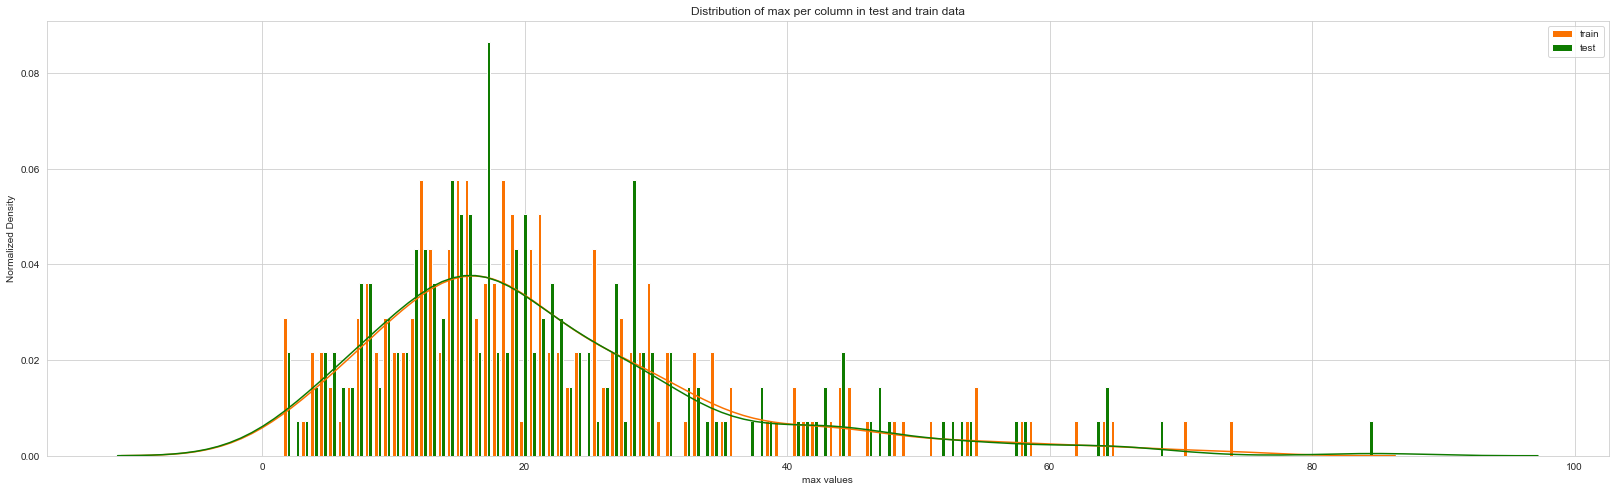

In [43]:
plot_stats(train_max_colwise,test_max_colwise,'max','column')

# Feature Engineering

#### Correlation between variables

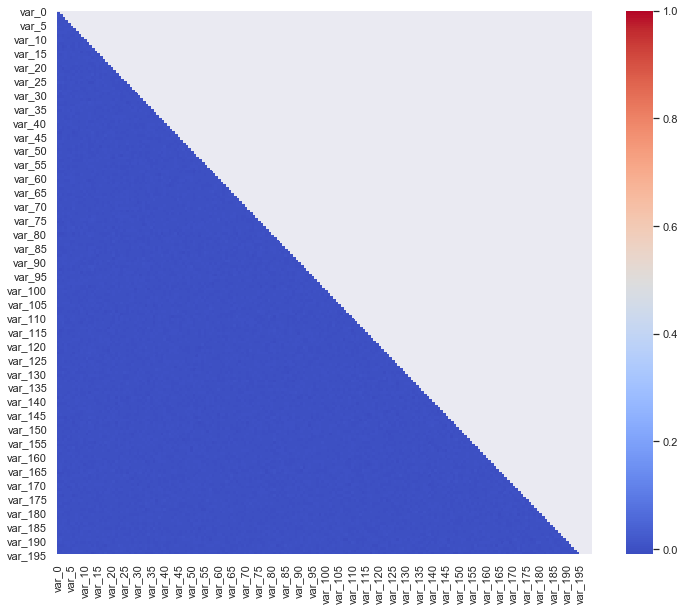

In [44]:
sns.set(rc={'figure.figsize':(12,10)})

# Compute the correlation matrix
corr = train_data[numerical_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            #annot=True, 
            #fmt=".2f", 
            cmap='coolwarm')

##### Observed
1. We have 200 features that are mostly uncorrelated between them.
2. 200 numerical features that their histograms have a shape like the one of a normal distribution.¶

In [11]:
# At this point of time we should check for among 200 features which variables are useful for us.
# As the features are anonymous. This can be done by using PCA
# scale the data before using PCA
mmscale = MinMaxScaler()  
X_train = mmscale.fit_transform(train_data.drop(['target','ID_code'],axis=1))  
X_test = mmscale.transform(test_data.drop(['ID_code'],axis=1)) 

In [15]:
pca = PCA()  
a = pca.fit_transform(X_train) 
print("Trasformed shape of train data: ", a.shape)
b = pca.transform(X_test)
print("Trasformed shape of test data: ", b.shape)


Trasformed shape of train data:  (200000, 200)
Trasformed shape of test data:  (200000, 200)


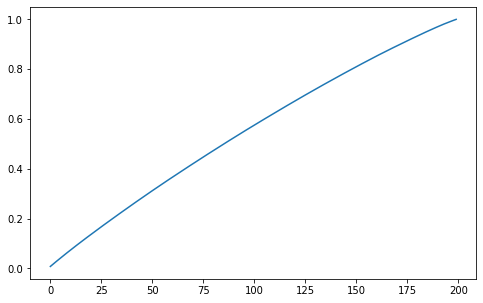

In [13]:
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8,5))
plt.plot(np.arange(200), np.cumsum(explained_variance))

##### Observed
1. The line of cumulative sums of explained variance ratio when you PCA the data set, it is indicative of a dataset that has already undergone PCA (get straight line ie y=x).
2. We have to go with all 200 variables.

### Adding Feature

In [17]:
#adding features
for df in [train_data,test_data]:
    df['sum'] = df[numerical_features].sum(axis=1)  
    df['min'] = df[numerical_features].min(axis=1)
    df['max'] = df[numerical_features].max(axis=1)
    df['mean'] = df[numerical_features].mean(axis=1)
    df['std'] = df[numerical_features].std(axis=1)
    df['skew'] = df[numerical_features].skew(axis=1)
    df['kurt'] = df[numerical_features].kurtosis(axis=1)
    df['med'] = df[numerical_features].median(axis=1)
    

In [18]:
train_data.shape

(200000, 210)

In [19]:
train_data.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_198  var_199        sum      min      max      mean  \
0  18.6266  ...  12.7803  -1.0914  1456.3182 -21.4494  43.1127  7.281591   
1  16.5338  ...  18.3560   1.9518  1415.3636 -47.3797  40.5632  7.076818   
2  14.6155  ...  14.7222   0.3965  1240.8966 -22.4038  33.8820  6.204483   
3  14.9250  ...  17.9697  -8.9996  1288.2319 -35.1659  38.1015  6.441159   
4  19.2514  ...  17.9974  -8.8104  1354.2310 -65.4863  41.1037  6.771155   

         std      skew      kurt      med  
0   9.331540  0.101580  1.331023  6.77040  
1  10.336130 -0.351734  4.110215  7.22315  
2   8.753387 -0.056957  0.546438  5.89940  
3   9.594064 -0.480116  2.630499  6.70260  
4  11.287122 -1.463426  9.787399  6.94735  

[5 rows x 210 columns]

In [50]:
test_data.shape

(200000, 209)

# Model Development

In [52]:
#Divide data into train and test
X = train_data.values[:, 2:]
Y = train_data.values[:,1] #ValueError: Unknown label type: 'unknown'
#Therefore we convert Y object to int
Y=Y.astype('int') 

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2,random_state=100)

# 1] Logistic Regression

In [53]:
logreg = LogisticRegression().fit(X_train, y_train)
logit_pred = logreg.predict(X_test)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
CM = pd.crosstab(y_test, logit_pred)
print(CM)
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print("Accuracy score:", ((TP+TN)*100)/(TP+TN+FP+FN))
print("False Positive rate: ", (FP*100)/(FP+TN)) #Type-1 error
print("False Negative rate: ", (FN*100)/(FN+TP)) #Type-2 error
print("Specificity/True Negative rate: ", (TN*100)/(FP+TN))
print("Recall/ True Positive rate: ", (TP*100)/(FN+TP))
#print("AUC Score is: ", metrics.roc_auc_score(y_test, logit_pred))
# Accuracy score: 91.2275
# False Positive rate:  1.377525463349474
# False Negative rate:  74.12690605017215
# Specificity/True Negative rate:  98.62247453665053
# Recall/ True Positive rate:  25.87309394982784

col_0      0     1
row_0             
0      35423   511
1       2933  1133
Accuracy score: 91.39
False Positive rate:  1.4220515389324873
False Negative rate:  72.13477619281849
Specificity/True Negative rate:  98.5779484610675
Recall/ True Positive rate:  27.865223807181504


In [55]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, logit_pred)
auc_score=metrics.auc(fpr, tpr)
print("AUC Score is: ", auc_score)

AUC Score is:  0.6322158613412451


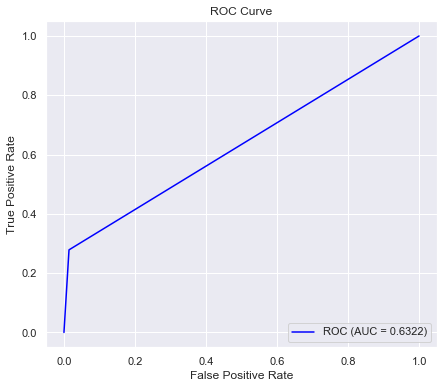

In [56]:
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# 2] Decision Tree Classifier

In [57]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#predict new test cases
C50_Predictions = C50_model.predict(X_test)

In [58]:
#Build confusion matrix
CM = pd.crosstab(y_test, C50_Predictions)
print(CM)
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print("Accuracy score:", ((TP+TN)*100)/(TP+TN+FP+FN))
print("False Positive rate: ", (FP*100)/(FP+TN)) #Type-1 error
print("False Negative rate: ", (FN*100)/(FN+TP)) #Type-2 error
print("Specificity/True Negative rate: ", (TN*100)/(FP+TN))
print("Recall/ True Positive rate: ", (TP*100)/(FN+TP))
#print("AUC Score is: ", metrics.roc_auc_score(y_test, C50_Predictions))
# Accuracy score: 83.53
# False Positive rate:  9.18906884844437
# False Negative rate:  80.81652729955731
# Specificity/True Negative rate:  90.81093115155564
# Recall/ True Positive rate:  19.183472700442696

col_0      0     1
row_0             
0      32648  3286
1       3268   798
Accuracy score: 83.615
False Positive rate:  9.144542772861357
False Negative rate:  80.37383177570094
Specificity/True Negative rate:  90.85545722713864
Recall/ True Positive rate:  19.626168224299064


In [59]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, C50_Predictions)
auc_score=metrics.auc(fpr, tpr)
print("AUC Score is: ", auc_score)

AUC Score is:  0.5524081272571885


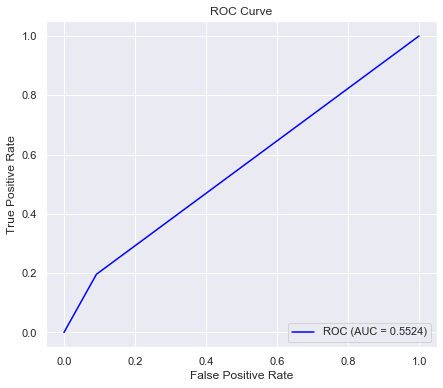

In [60]:
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# 3] Random Forest Classifier

In [61]:
#Random Forest
RF_model = RandomForestClassifier(n_estimators = 20).fit(X_train, y_train)

In [62]:
RF_Predictions = RF_model.predict(X_test)

In [63]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, RF_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print("Accuracy score:", ((TP+TN)*100)/(TP+TN+FP+FN))
print("False Positive rate: ", (FP*100)/(FP+TN)) #Type-1 error
print("False Negative rate: ", (FN*100)/(FN+TP)) #Type-2 error
print("Specificity/True Negative rate: ", (TN*100)/(FP+TN))
print("Recall/ True Positive rate: ", (TP*100)/(FN+TP))
# False Positive rate:  0.027828797239383314
# False Negative rate:  99.55730447614363
# Specificity/True Negative rate:  99.97217120276062
# Recall/ True Positive rate:  0.4426955238563699


Accuracy score: 89.8725
False Positive rate:  0.013914398619691657
False Negative rate:  99.50811608460404
Specificity/True Negative rate:  99.98608560138031
Recall/ True Positive rate:  0.49188391539596654


In [64]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, RF_Predictions)
auc_score=metrics.auc(fpr, tpr)
print("AUC Score is: ", auc_score)

AUC Score is:  0.5023898475838814


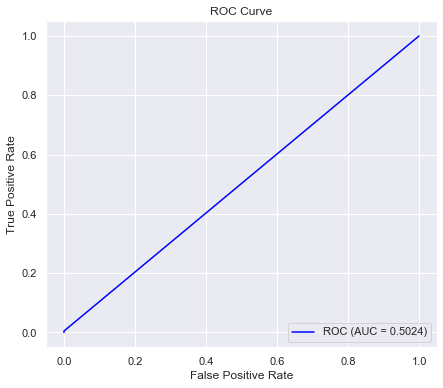

In [65]:
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# 4] Naive Bayes Classifier

In [66]:
#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)

In [67]:
#predict test cases
NB_Predictions = NB_model.predict(X_test)

In [68]:
#Build confusion matrix
CM = pd.crosstab(y_test, NB_Predictions)
print(CM)
#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]
#check accuracy of model
print("Accuracy score:", ((TP+TN)*100)/(TP+TN+FP+FN))
print("False Positive rate: ", (FP*100)/(FP+TN)) #Type-1 error
print("False Negative rate: ", (FN*100)/(FN+TP)) #Type-2 error
print("Specificity/True Negative rate: ", (TN*100)/(FP+TN))
print("Recall/ True Positive rate: ", (TP*100)/(FN+TP))
# Accuracy score: 91.98
# False Positive rate:  1.6474647965714921
# False Negative rate:  64.33841613379242
# Specificity/True Negative rate:  98.3525352034285
# Recall/ True Positive rate:  35.66158386620757


col_0      0     1
row_0             
0      35212   722
1       2593  1473
Accuracy score: 91.7125
False Positive rate:  2.0092391606834754
False Negative rate:  63.772749631087066
Specificity/True Negative rate:  97.99076083931652
Recall/ True Positive rate:  36.227250368912934


In [69]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, NB_Predictions)
auc_score=metrics.auc(fpr, tpr)
print("AUC Score is: ", auc_score)

AUC Score is:  0.6710900560411474


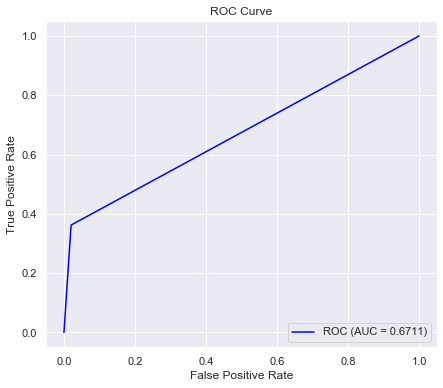

In [70]:
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='blue',label='ROC (AUC = %0.4f)' % auc_score)
plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Predict target value for Test dataset

In [71]:
store_id= test_data['ID_code']

In [72]:
test_data.drop(['ID_code'],axis=1,inplace=True)

In [73]:
NB_Predictions = NB_model.predict(test_data)

#### Storing predicted target with ID_code in new dataframe

In [74]:
new_df=pd.DataFrame({'ID_code': store_id, 'Predicted_target':NB_Predictions})
new_df

ID_code  Predicted_target
0            test_0                 0
1            test_1                 0
2            test_2                 0
3            test_3                 0
4            test_4                 0
...             ...               ...
199995  test_199995                 0
199996  test_199996                 0
199997  test_199997                 0
199998  test_199998                 0
199999  test_199999                 0

[200000 rows x 2 columns]

In [75]:
new_df.to_csv('New_data.csv',index=False)

In [76]:
mydf=pd.read_csv('New_data.csv')
mydf.head()

ID_code  Predicted_target
0  test_0                 0
1  test_1                 0
2  test_2                 0
3  test_3                 0
4  test_4                 0

In [77]:
#test_data['Predicted_target']=NB_Predictions

In [78]:
#test_data